In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import statsmodels.formula.api as smf
import warnings
import scipy.stats as scs

warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def q25(x):
  return x.quantile(0.25)

def q50(x):
  return x.quantile(0.5)

def q75(x):
  return x.quantile(0.75)

def range(x):
  return x.max() - x.min()  

In [3]:
def diagnostico_residuos(resids):
  # create placeholder subplots
  fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,6))
  r = resids
  resids = (r - np.nanmean(r)) / np.nanstd(r)
  resids_nonmissing = resids[~(np.isnan(resids))]
  # residuals over time
  sns.scatterplot(x=np.arange(1, len(resids)+1), y=resids, ax=ax1)
  ax1.axhline(0, color='r', linestyle='--')  
  ax1.set_title('Residuos Estandarizados')
  # distribution of residuals
  x_lim = (-1.96 * 2, 1.96 * 2)
  r_range = np.linspace(x_lim[0], x_lim[1])
  norm_pdf = scs.norm.pdf(r_range)
  sns.distplot(resids_nonmissing, hist=True, kde=True,norm_hist=True, ax=ax2)
  ax2.plot(r_range, norm_pdf, 'g', lw=2, label='N(0,1)')
  ax2.set_title('Distribución de residuales estandarizados')
  ax2.set_xlim(x_lim)
  ax2.legend()
  # Q-Q plot
  qq = sm.qqplot(resids_nonmissing, line='s', ax=ax3)
  ax3.set_title('Q-Q plot')
  # Hide last plot
  ax4.axis('off')
  fig.tight_layout(pad=2)
  return fig

In [4]:
df_tp = pd.read_csv('/content/drive/MyDrive/TP2.csv')

Nombre -	Etiqueta

price -	Precio mediano

crime -	Crímenes per capita

nox -	Polución (cada 100 m)

rooms -	Número de habitaciones

dist - Distancia zonas productivas

radial - Conectividad

proptax -	Impuestos

stratio -	Razón alumno/profesor

lowstat -	Porcentaje de personas de “bajo status”


In [5]:
df_tp.head()

,price,crime,nox,rooms,dist,radial,proptax,stratio,lowstat,lprice,lnox,lproptax
0,24000,0.006,5.38,6.57,4.09,1,29.600000,15.300000,4.98,10.085809,1.682688,5.690360
1,21599,0.027,4.69,6.42,4.97,2,24.200001,17.799999,9.14,9.980402,1.545433,5.488938
2,34700,0.027,4.69,7.18,4.97,2,24.200001,17.799999,4.03,10.454495,1.545433,5.488938
3,33400,0.032,4.58,7.00,6.06,3,22.200001,18.700001,2.94,10.416311,1.521699,5.402678
4,36199,0.069,4.58,7.15,6.06,3,22.200001,18.700001,5.33,10.496787,1.521699,5.402678


**PUNTO 1**

In [6]:
df_tp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     506 non-null    int64  
 1   crime     506 non-null    float64
 2   nox       506 non-null    float64
 3   rooms     506 non-null    float64
 4   dist      506 non-null    float64
 5   radial    506 non-null    int64  
 6   proptax   506 non-null    float64
 7   stratio   506 non-null    float64
 8   lowstat   506 non-null    float64
 9   lprice    506 non-null    float64
 10  lnox      506 non-null    float64
 11  lproptax  506 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 47.6 KB


En el dataset hay 506 observaciones y 12 columnas sin ningún valor nulo en ellas.

In [7]:
df_tp.agg(['min', q25, q50, q75, 'max', 'mean',range,'std','skew','kurt']).T.loc[:'lowstat']

,min,q25,q50,q75,max,mean,range,std,skew,kurt
price,5000.000000,16850.0000,21200.0000,24999.000000,50001.000000,22511.509881,45001.000000,9208.856171,1.109568,1.485846
crime,0.006000,0.0820,0.2565,3.677000,88.975998,3.611536,88.969998,8.590247,5.233601,37.305912
nox,3.850000,4.4900,5.3800,6.240000,8.710000,5.549783,4.860000,1.158395,0.724734,-0.069637
rooms,3.560000,5.8825,6.2100,6.620000,8.780000,6.284051,5.220000,0.702594,0.404004,1.889982
dist,1.130000,2.1000,3.2100,5.187500,12.130000,3.795751,11.000000,2.106137,1.012032,0.487790
radial,1.000000,4.0000,5.0000,24.000000,24.000000,9.549407,23.000000,8.707259,1.004815,-0.867232
proptax,18.700001,27.9000,33.0000,66.599998,71.099998,40.823715,52.399997,16.853711,0.669956,-1.142408
stratio,12.600000,17.4000,19.1000,20.200001,22.000000,18.459289,9.400000,2.165820,-0.806780,-0.282833
lowstat,1.730000,6.9225,11.3600,17.057500,39.070000,12.701482,37.340000,7.238066,0.947746,0.640760


A partir de las estadísticas descriptivas del cuadro anterior se puede observar en cada variable que: 

* Price: la media es de $22511.51 y la desviación respecto a la media es de $ 9208.86. Es la variable con mayor dispersión. En cuanto a la distribución de probabilidad, las observaciones están altamente sesgadas hacia la derecha (asimetría positiva) y es leptocurtica, es decir, hay una alta concentración de datos alrededor de la media. Sumado a lo anterior, es muy probable que haya una gran cantidad de outliers ya que la diferencia porcentual entre el cuarto y tercer cuartil es de casi un % 100.

* Crime: la media es de 3.611536 y la desviación respecto a la media es de 8.59. En cuanto a la distribución de probabilidad, las observaciones están altamente sesgadas hacia la derecha (asimetría positiva) y es leptocurtica. Con sus valores de asimtería, curtosis y diferencia porcentual entre el cuarto y tercer cuartil de % 2319.79 debería de haber una gran cantidad de outliers.

* Nox: la media es de 5.549783 y la desviación respecto a la media es de 1.158395. En cuanto a la distribución de probabilidad, las observaciones están altamente sesgadas hacia la derecha (asimetría positiva) y platicurtica. En ésta variable no debería de haber muchos outliers ya que su curtosis es casi igual a 0.

* Rooms: la media es de 6.284051 y la desviación respecto a la media es de 0.702594. En cuanto a la distribución de probabilidad, si bien las observaciones están levemente sesgadas hacia la derecha tiende a una distribución simetrica  y leptocurtica. Debido a la gran cantidad de observaciones concetradas alrededor de la media, quizá hayan varios outliers.

* Dist: la media es de 3.795751 y la desviación respecto a la media es de 2.106137. En cuanto a la distribución de probabilidad, las observaciones están altamente sesgadas hacia la derecha (asimetría positiva) y es leptocurtica. Al ser la curtosis no tan alta no debiera de tener muchos valores anormales.

* Radial: la media es de 9.549407 y la desviación respecto a la media es de 8.707259. En cuanto a la distribución de probabilidad, las observaciones están altamente sesgadas hacia la derecha (asimetría positiva) y es platicurtica por lo que no debiera de haber outliers.

* Proptax: la media es de 40.823715 y la desviación respecto a la media es de 16.853711. En cuanto a la distribución de probabilidad, las observaciones están levemente sesgadas hacia la derecha (asimetría positiva) y al ser el valor de la curtosis tan pequeño (platicurtica) no hay outliers.

* Stratio: la media es de 18.459289 y la desviación respecto a la media es de 2.165820. En cuanto a la distribución de probabilidad, las observaciones están levemente sesgadas hacia la izquierda (asimetría negativa) y al ser el valor de la curtosis negativo y no tan lejano al 0 (platicurtica) no debería de haber muchos outliers.

* Lowstat: la media es de 12.701482 y la desviación respecto a la media es de 7.238066. En cuanto a la distribución de probabilidad, las observaciones están levemente sesgadas hacia la derecha (asimetría positiva) y es leptocurtica. Quiza nos encontremos con outliers.

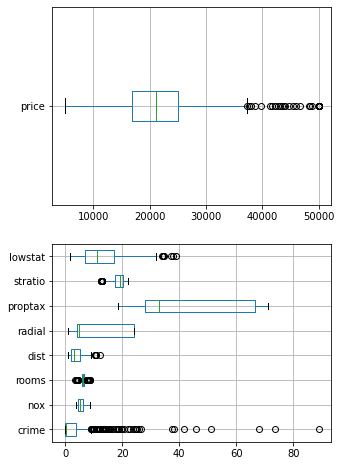

In [8]:
fig, axes = plt.subplots(2, figsize=(5,8))
df_tp.loc[:,'price'].to_frame().boxplot(ax=axes[0], vert=False)
df_tp.loc[:,'crime':'lowstat'].boxplot(ax=axes[1],vert=False)

**PUNTO 2**

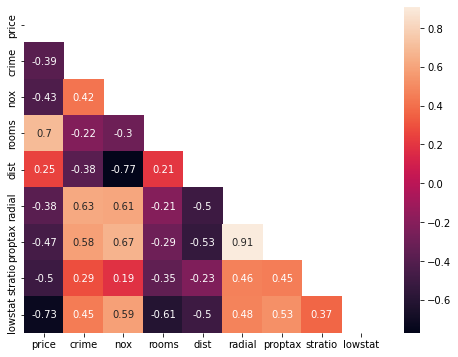

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(df_tp.loc[:,:'lowstat'].corr(), mask=np.triu(df_tp.loc[:,:'lowstat'].corr()), annot=True)

Al observar el heatmap, la variable price tiene una correlación negativa con lowstat, stratio, nox y crime tal como esperaba; en cambio proptax, si bien tiene correlación negativa, no esperaba la misma ya que al ser el precio de una vivienda mayor los impuestos abonados debieran de ser mayores. En cuanto a las relaciones positivas con el precio nos encontramos con rooms y dist, dichas relaciones tienen sentido ya que al haber mas cuartos implica que en promedio hay más metros cuadrados cubiertos, y al haber una mayor distancia con zonas productivas implica que las viviendas se encuentren en zonas residenciales por lo que hace aumentar el precio de las mismas.

En cuanto al resto de las variables se puede observar que hay una alta correlación positiva entre radial y crime, proptax y crime, radial y nox, proptax y nox, lowstat y nox, proptax y radial, proptax y lowstat. Las correlaciones altas negativas que muestran los datos son dist y nox, rooms y lowstat, proptax y dist.

**PUNTO 3**

In [10]:
Y = df_tp.price.copy()
X = df_tp[['nox','rooms','crime','radial']].copy()
X = sm.add_constant(X)

In [11]:
# Ajustar modelo
modelo = sm.OLS(Y,X)
resultados = modelo.fit(cov_type='HC1')
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     124.8
Date:                Fri, 01 Apr 2022   Prob (F-statistic):           8.10e-74
Time:                        10:21:28   Log-Likelihood:                -5124.8
No. Observations:                 506   AIC:                         1.026e+04
Df Residuals:                     501   BIC:                         1.028e+04
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.033e+04   5162.718     -3.937      0.0

El modelo ajustado a nuestros datos utiliza las variables polución (cada 100m), número de cuartos, crimen per capita y el acceso a carreteras radiales para explicar la variación en el precio de las viviendas. 

Para el analísis de cada coeficiente vamos a suponer que el resto de las variables se mantienen constantes (ceteris paribus). De ésta forma encontramos que el precio de una vivienda:
- Ante un cambio unitario en la variable polución disminuye $1034.17

- Ante un cambio unitario el N° de cuartos aumenta $7951.83

- Ante un cambio unitario en el crimen per capita disminuye $161.01

- Ante un cambio unitario en el acceso a carreteras radiales disminuye $84.85

Todas los Betas estimados son estadisticamente significativos excepto el del acceso a carreteras radiales (p > 0.05), es decir que el valor de éste parámetro puede ser igual a 0 (no influye en nuestra variable dependiente).

El coeficiente de determinación nos indica que el 56.6% de la varianza en el precio de las viviendas es explicado por nuestro modelo.

**PUNTO 4**

In [12]:
df_tp['squared_rooms'] = df_tp.rooms ** 2

In [13]:
Y = df_tp.price.copy()
X = df_tp[['nox','rooms','squared_rooms','crime','radial']].copy()
X = sm.add_constant(X)

In [14]:
model_2 = sm.OLS(Y, X)
resultados_2 = model_2.fit(cov_type='HC1')
print(resultados_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     174.7
Date:                Fri, 01 Apr 2022   Prob (F-statistic):          3.02e-107
Time:                        10:21:28   Log-Likelihood:                -5061.0
No. Observations:                 506   AIC:                         1.013e+04
Df Residuals:                     500   BIC:                         1.016e+04
Df Model:                           5                                         
Covariance Type:                  HC1                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.088e+05   1.67e+04      6.516

Como el coeficiente de rooms es negativo y el de rooms2 es positivo, esta ecuación implica que, para valores bajos de rooms, una habitación más tiene un efecto negativo sobre el precio. En algún punto el efecto se vuelve positivo, y la forma cuadrática significa que la semielasticidad de price respecto a rooms aumenta a medida que rooms aumenta

El valor del punto de inflexión de rooms se obtiene empleando la ecuación: 
Rooms*=31811.89/6148.026=5.17

Es poco creíble que al aumentar habitaciones disminuya el precio, sin embargo, la cantidad de casas con menos de 5.17 habitaciones son pocas en relaci, por lo que la parte representativa de la ecuación está al lado derecho, en el cual aumenta el precio cuando aumenta la cantidad.


**PUNTO 5**

In [15]:
log_Y = np.log(df_tp.price.rename('lprice'))
log_X = np.log(df_tp[['nox','rooms','crime','radial']].rename(columns={'nox':'lnox','rooms':'lrooms','crime':'lcrime','radial':'lradial'}))
log_X = sm.add_constant(log_X)

In [16]:
log_model = sm.OLS(log_Y, log_X)
log_resultados = log_model.fit(cov_type='HC1')
print(log_resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     87.29
Date:                Fri, 01 Apr 2022   Prob (F-statistic):           3.05e-56
Time:                        10:21:28   Log-Likelihood:                -75.960
No. Observations:                 506   AIC:                             161.9
Df Residuals:                     501   BIC:                             183.1
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0039      0.428     16.382      0.0

La interpretación de éste modelo log-log es que a partir de un cambio del 1% de la varaible que estemos analizando, suponiendo que el resto de las variables independientes se mantienen constantes, el precio de la vivienda variará en la misma proporción que el Beta de la variable en cuestión. Ejemplo: ante un cambio del 1% de 'lrooms', el precio de la vivienda aumentara % 1.7171.

**PUNTO 6**

In [17]:
np.round(resultados.aic,4)

10259.6311

In [18]:
np.round(log_Y.sum()*2 + log_resultados.aic,4)

10222.2692

El modelo que mejor ajusta a nuestros datos es el log-log ya que el AIC ajustado es menor que el AIC del modelo lineal. 

AIC log-log 10222.2692 < 10259.6311 AIC mod. lineal.

**PUNTO 7**

In [19]:
# Elasticidad modelo log-log
np.round(log_resultados.params.lcrime, 4) 

-0.0694

La disponibilidad marginal a pagar por vivir en un vecindario más seguro es del % 0.0694. Es decir, ante un incremento del 1 % del crimen en un vecindario dado, los individuos de la muestra están dispuesto a pagar % -0.0694 menos por la vivienda.

**PUNTO 8**

In [20]:
df_tp['nox_2'] = np.where(df_tp.nox > 6, 1, 0)

In [22]:
fit = smf.ols('price ~ rooms + crime + radial + C(nox_2)', data=df_tp).fit(cov_type='HC1') 

print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     86.66
Date:                Fri, 01 Apr 2022   Prob (F-statistic):           6.42e-56
Time:                        10:21:59   Log-Likelihood:                -5130.1
No. Observations:                 506   AIC:                         1.027e+04
Df Residuals:                     501   BIC:                         1.029e+04
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.701e+04   4255.889     -6.346